<a href="https://colab.research.google.com/github/muhammad-usama-aleem/preprocessing-for-object-detection/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 74 bytes


In [1]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 69254, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 69254 (delta 9), reused 6 (delta 0), pack-reused 69237
Receiving objects: 100% (69254/69254), 577.32 MiB | 29.29 MiB/s, done.
Resolving deltas: 100% (48821/48821), done.


In [ ]:
!kaggle datasets download -d jessicali9530/stanford-cars-dataset

 99% 1.81G/1.82G [00:49<00:00, 36.9MB/s]
100% 1.82G/1.82G [00:49<00:00, 39.8MB/s]


In [ ]:
!unzip /content/stanford-cars-dataset.zip

In [ ]:
!rm -rf /content/stanford-cars-dataset.zip

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import os

path, dirs, files = next(os.walk("/content/gdrive/MyDrive/car_ims/car_ims/car_ims"))
file_count = len(files)
file_count

16185

In [4]:
from scipy.io import loadmat
resp = loadmat("cars_annos.mat")


In [5]:
resp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])

In [6]:
resp.get("annotations")[0]

array([(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       ...,
       (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8)),
       (array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), array([[60]],

In [ ]:
len(resp.get("annotations")[0])

16185

In [7]:
len(resp.get("class_names")[0])

196

In [8]:
classes = []
for class_name in resp.get("class_names")[0]:
    classes.append(class_name[0])

In [9]:
data = []

for annot in resp.get("annotations")[0]:
    image_name = annot[0][0].split("/")[-1]
    xmin = int(annot[1][0][0])
    ymin = int(annot[2][0][0])
    xmax = int(annot[3][0][0])
    ymax = int(annot[4][0][0])
    class_name = classes[annot[5][0][0] - 1]
    test = int(annot[6][0][0])
    
    #data.append([image_name, xmin, ymin, xmax, ymax, class_name, test])
    data.append({
        'image' : image_name, 'xmin' : xmin, 'ymin' : ymin, 'xmax' : xmax, 
        'ymax' : ymax, 'class' : class_name, 'test' : test
                })

In [10]:
data[0]

{'class': 'AM General Hummer SUV 2000',
 'image': '000001.jpg',
 'test': 0,
 'xmax': 853,
 'xmin': 112,
 'ymax': 717,
 'ymin': 7}

# **save data as CSV**

In [11]:
import pandas as pd
df = pd.DataFrame(data, columns=['image', 'xmin', 'ymin', 'xmax', 'ymax', 'class', 'test'])
df

,image,xmin,ymin,xmax,ymax,class,test
0,000001.jpg,112,7,853,717,AM General Hummer SUV 2000,0
1,000002.jpg,48,24,441,202,AM General Hummer SUV 2000,0
2,000003.jpg,7,4,277,180,AM General Hummer SUV 2000,0
3,000004.jpg,33,50,197,150,AM General Hummer SUV 2000,0
4,000005.jpg,5,8,83,58,AM General Hummer SUV 2000,0
...,...,...,...,...,...,...,...
16180,016181.jpg,38,36,375,234,smart fortwo Convertible 2012,1
16181,016182.jpg,29,34,235,164,smart fortwo Convertible 2012,1
16182,016183.jpg,25,32,587,359,smart fortwo Convertible 2012,1
16183,016184.jpg,56,60,208,186,smart fortwo Convertible 2012,1


In [12]:
df.to_csv("labels.csv", index=None)

# **save data as json**

In [13]:
import json

with open("labels.json", "w") as file:
    json.dump(data, file, indent=4)

In [ ]:
drive.flush_and_unmount()

# **Visulization**

002673.jpg
013557.jpg
012590.jpg
002413.jpg
007459.jpg
012691.jpg
001251.jpg
011743.jpg
006934.jpg
002306.jpg


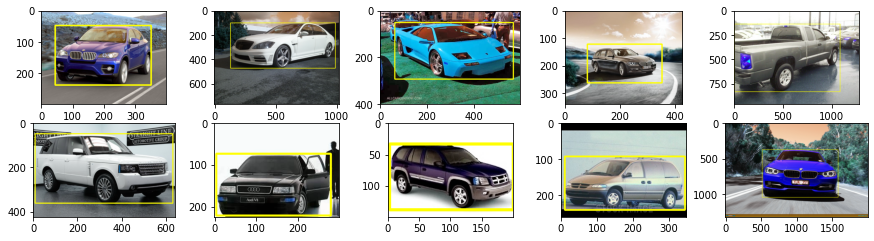

In [14]:
import cv2
import matplotlib.pyplot as plt
import os
from random import shuffle
import tensorflow as tf

images_dir = "/content/gdrive/MyDrive/car_ims/car_ims/car_ims/"


shuffle(data)
plt.figure(figsize=(15, 10))


for index, annotation in enumerate(data[:10]):
    print(annotation['image'])
    image = cv2.imread(images_dir + annotation['image'])
    image = cv2.rectangle(image, (annotation['xmin'], annotation['ymin']),
                         (annotation['xmax'], annotation['ymax']), (255, 255, 0), 3)
    plt.subplot(5, 5, index + 1)
    plt.imshow(image)